In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('./data/fake_job_postings.csv')
df_ori = df.copy()
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


## EDA

In [3]:
df.shape[0]

17880

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Harold Uribe Romero\AppData\Local\Temp\ipykernel_21152\4226207916.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(missing_values_count.values/df.shape[0]*100), y=missing_values_count.index, palette="viridis")


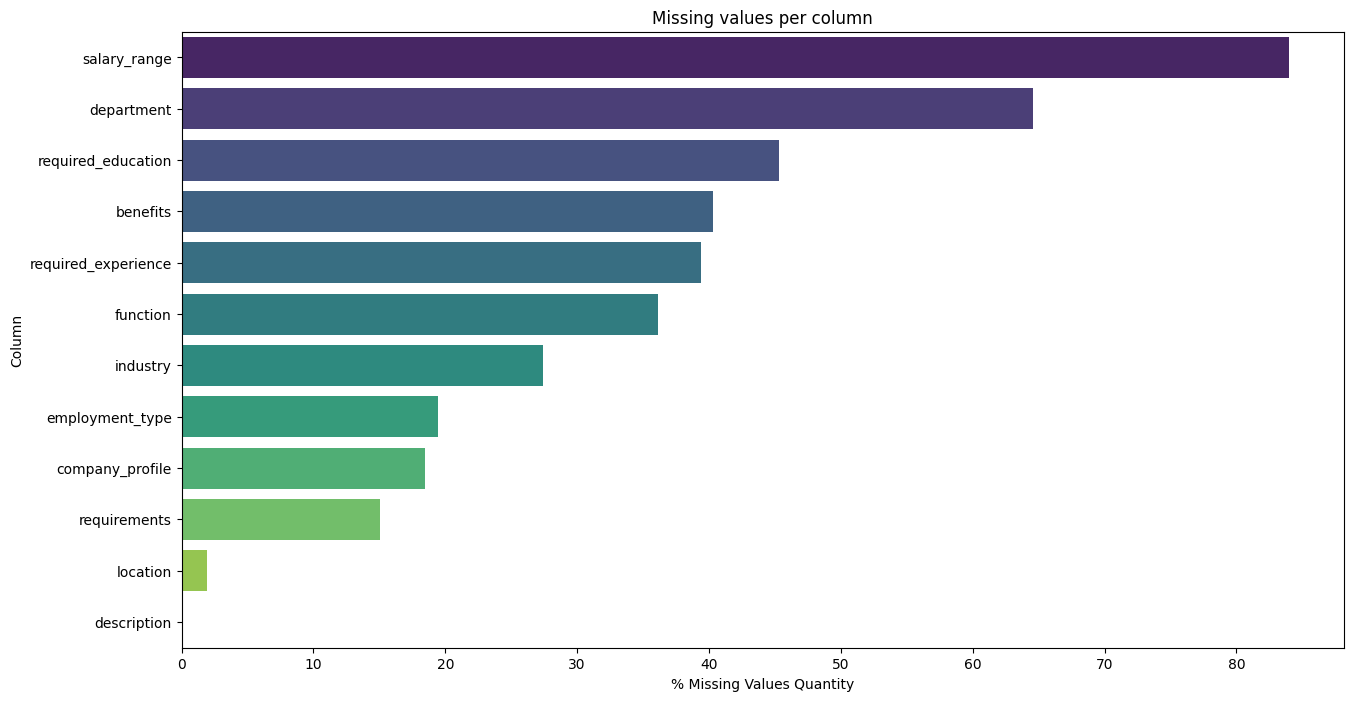

In [6]:
plt.figure(figsize=(15, 8))

# Conteo de valores faltantes
missing_values_count = df.isnull().sum()

# Filtrar y ordenar las columnas con valores faltantes
missing_values_count = missing_values_count[missing_values_count > 0].sort_values(ascending=False)

# Creación de un gráfico de barras para visualizar los valores faltantes
sns.barplot(x=(missing_values_count.values/df.shape[0]*100), y=missing_values_count.index, palette="viridis")
plt.title("Missing values per column")
plt.xlabel("% Missing Values Quantity")
plt.ylabel("Column")

# Mostrar el gráfico
plt.show()

In [7]:
df['fraudulent'].value_counts(normalize=True)*100

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

C:\Users\Harold Uribe Romero\AppData\Local\Temp\ipykernel_21152\1973299769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['fraudulent'].value_counts().index, y=df['fraudulent'].value_counts().values, palette="viridis")


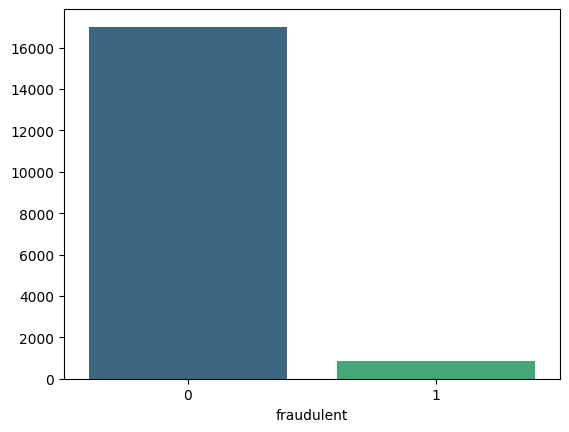

In [18]:
sns.barplot(x=df['fraudulent'].value_counts().index, y=df['fraudulent'].value_counts().values, palette="viridis")
plt.show()


Here we have an unbalanced dataset. An important topic to handle with.

## Cleaning

### Remove unnecessary columns

In [8]:
del df['job_id']

### Location standarizing

In [9]:
# Fill null values on location with "No location"
df['location'].fillna("No location", inplace=True)

# Extract from location the country
df['country'] = df['location'].apply(lambda x: x.split(", ")[0])
df['country'].head()

del df['location']

## Filling missing values

In [10]:
missing_values_count/df.shape[0]*100

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
dtype: float64

In [11]:
del df['salary_range']

In [12]:
## When benefits is not null, then fill with 1, other scenario fill with 0 value
def fill_missing_values(x):
    if type(x) == str:
        return 1
    else:
        return 0


In [13]:
df['benefits'] = df['benefits'].apply(fill_missing_values)
df['company_profile'] = df['company_profile'].apply(fill_missing_values)
df['description'] = df['description'].apply(fill_missing_values)
df['requirements'] = df['requirements'].apply(fill_missing_values)

df.head()

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,Marketing,1,1,1,0,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,Customer Service - Cloud Video Production,Success,1,1,1,1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),NaN,1,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,Account Executive - Washington DC,Sales,1,1,1,1,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,NaN,1,1,1,1,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


### Handling Missing Values

In [14]:
df['department'].fillna("No registered", inplace=True)
df['required_education'].fillna("No registered", inplace=True)
df['required_experience'].fillna("No registered", inplace=True)
df['industry'].fillna("No registered", inplace=True)
df['function'].fillna("No registered", inplace=True)
df['employment_type'].fillna("No registered", inplace=True)

In [15]:
df.head(10)

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,Marketing,1,1,1,0,0,1,0,Other,Internship,No registered,No registered,Marketing,0,US
1,Customer Service - Cloud Video Production,Success,1,1,1,1,0,1,0,Full-time,Not Applicable,No registered,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),No registered,1,1,1,0,0,1,0,No registered,No registered,No registered,No registered,No registered,0,US
3,Account Executive - Washington DC,Sales,1,1,1,1,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,No registered,1,1,1,1,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,Accounting Clerk,No registered,0,1,0,0,0,0,0,No registered,No registered,No registered,No registered,No registered,0,US
6,Head of Content (m/f),ANDROIDPIT,1,1,1,1,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,DE
7,Lead Guest Service Specialist,No registered,1,1,1,1,0,1,1,No registered,No registered,No registered,No registered,No registered,0,US
8,HP BSM SME,No registered,1,1,1,0,0,1,1,Full-time,Associate,No registered,Information Technology and Services,No registered,0,US
9,Customer Service Associate - Part Time,No registered,1,1,1,0,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,US


In [16]:
# df.to_csv('./data/fake_job_postings_clean.csv', index=False)

In [19]:
df.nunique()

title                  11231
department              1338
company_profile            2
description                2
requirements               2
benefits                   2
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
country                   91
dtype: int64